<a href="https://colab.research.google.com/github/ajinkyajumde/bulkpro/blob/main/Bulkpro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Case Study:**

Bulkpro is a company that specializes in procuring products (multiple categories) from local manufacturers in bulk and selling them via their website to other local purchasers (dealing in bulk quantity) throughout India.
Your dataset includes Product Data and Order Data for Bulkpro.
Product Data - This data file includes details of each product that is listed on the website including the product category, the website listing date, and the source channel through which the manufacturer has connected with Bulkpro to list the products on the website.
Order Data - This data file includes individual order details of different products that are listed on the website including order quantities, order date-time, etc. Each order is placed by an individual purchaser.
The Bulkpro management suggested the Data Analyst team figure out the reason for the decline of overall orders in the Platinum category placed (both in terms of the number of orders and in terms of daily product quantities ordered).
Use this data to analyze the performance of each channel/segment that can bring insights on the root cause of the problem and suggestions on key focus areas.
The Key Metrics to be looked at should be:
1. Monthly total order quantity
2. Daily total order quantity
3. Average Daily order quantity per product
4. New products onboarded (Monthly / Weekly / Daily)
5. Sales of new products onboarded (not every product that is listed on the website would actually be purchased)
Feel free to use different segments to understand the movements in key metrics. Also, define new metrics that would be useful in tracking business performance.
Assumption: Since product price has not been provided here, you can assume that each product is priced the same and that the profit margin on each product is also equal.


# **Output:**

1. Share a detailed working file on all insights (Excel / Power Bi / etc.). Include pivots / charts / crosstabs / etc.
2. Create a doc/pdf file summarizing the analysis that can be shared with the management to update them regarding Key Learnings.
3. The Bulkpro management suggested the Data Analyst team figure out the reason for the decline of overall orders in the Platinum category placed (both in terms of the number of orders and in terms of daily product quantities ordered).
4. Use this data to analyze the performance of each channel/segment that can bring insights on the root cause of the problem and suggestions on key focus areas. 

# **Importing Data and Neccessary libraries**

In [186]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [187]:
import pandas as pd

In [188]:
from datetime import datetime

In [189]:
import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                   # some useful functions
from tqdm import tqdm_notebook



%matplotlib inline

In [190]:
import matplotlib.pyplot as plt
import seaborn as sns

Firstly we look at the order table and store into df1 dataframe.

In [191]:
path='/content/drive/MyDrive/Almabetter projects/impactguru/order-master-bulkpro.xlsx'
df1=pd.read_excel(path)
df1.head(5)

,order-id,product-id,order-units,order-date
0,ord-1004367,YR294414SA,200,2020-01-01 09:21:58
1,ord-1004420,UZ216732XH,3000,2020-01-01 13:46:26
2,ord-1004421,UZ216732XH,3000,2020-01-01 14:18:59
3,ord-1004422,UZ216732XH,2000,2020-01-01 14:42:19
4,ord-1004423,UZ216732XH,3000,2020-01-01 14:54:17


The above data frame has detailed insights of all the orders in the first four months of the year 2020.

We have another sheet that has detailed insights of the products

In [192]:
path='/content/drive/MyDrive/Almabetter projects/impactguru/product-master-bulkpro.xlsx'
df2=pd.read_excel(path)
df2.head(5)

,Product-id,Product-category,Product-launch,Product-source,google-search-keyword
0,AH737757QD,platinum,2020-01-01 00:00:16,google,sell in bulk online
1,YR294414SA,sliver,2020-01-01 00:04:56,website,NaN
2,EA137670JT,platinum,2020-01-01 00:05:29,google,sell in bulk online
3,GD677868SD,platinum,2020-01-01 00:32:19,google,sell on flipkart
4,TJ988922PQ,platinum,2020-01-01 05:19:12,website,NaN


Each product has been categorized into 4 groups Gold,Platinum,Silver and Bronze. Different products have different product source and the source plays vital role in the availability for sale and marketing strategy.

In [193]:
df3=pd.merge(df1, df2, how='left', left_on=['product-id'], right_on=['Product-id'])

We apply left join so as to have detailed insights of all the orders along with the product details.

In [194]:
df3.head()

,order-id,product-id,order-units,order-date,Product-id,Product-category,Product-launch,Product-source,google-search-keyword
0,ord-1004367,YR294414SA,200,2020-01-01 09:21:58,YR294414SA,sliver,2020-01-01 00:04:56,website,NaN
1,ord-1004420,UZ216732XH,3000,2020-01-01 13:46:26,UZ216732XH,platinum,2020-01-01 12:03:51,tele-sales,NaN
2,ord-1004421,UZ216732XH,3000,2020-01-01 14:18:59,UZ216732XH,platinum,2020-01-01 12:03:51,tele-sales,NaN
3,ord-1004422,UZ216732XH,2000,2020-01-01 14:42:19,UZ216732XH,platinum,2020-01-01 12:03:51,tele-sales,NaN
4,ord-1004423,UZ216732XH,3000,2020-01-01 14:54:17,UZ216732XH,platinum,2020-01-01 12:03:51,tele-sales,NaN


The above dataframe has all the details of all the orders along with the product details.

# **Exploratory Data Analysis**

In [195]:
df2.groupby('Product-category')['Product-id'].count()

Product-category
bronze      1045
gold         907
platinum    9292
sliver      3686
Name: Product-id, dtype: int64

The above frame shows the distribution of the products, category wise. We have most of the products with Platinum category followed by silver, bronze and gold.

In [196]:
df3.groupby('Product-category')['order-id'].count()

Product-category
bronze       1110
gold         2750
platinum    67273
sliver       4597
Name: order-id, dtype: int64

We can conclude that most of the orders are placed for the products of platinum category. So the platinum category plays important role in our business and our prime focus should be to maximize and maintain the demand for platinum category products.

In [197]:
df3['month_of_date'] = df3['order-date'].dt.month
df3['day_of_date'] = df3['order-date'].dt.day
df3['year_of_date'] = df3['order-date'].dt.year
df3['date'] = df3['order-date'].dt.date
df3['Week_Number'] = df3['order-date'].dt.week


We extract the date, month and day from the order date column which will help us in getting more insights about the orders based on month and date. 

In [198]:
df3.head()

,order-id,product-id,order-units,order-date,Product-id,Product-category,Product-launch,Product-source,google-search-keyword,month_of_date,day_of_date,year_of_date,date,Week_Number
0,ord-1004367,YR294414SA,200,2020-01-01 09:21:58,YR294414SA,sliver,2020-01-01 00:04:56,website,NaN,1,1,2020,2020-01-01,1
1,ord-1004420,UZ216732XH,3000,2020-01-01 13:46:26,UZ216732XH,platinum,2020-01-01 12:03:51,tele-sales,NaN,1,1,2020,2020-01-01,1
2,ord-1004421,UZ216732XH,3000,2020-01-01 14:18:59,UZ216732XH,platinum,2020-01-01 12:03:51,tele-sales,NaN,1,1,2020,2020-01-01,1
3,ord-1004422,UZ216732XH,2000,2020-01-01 14:42:19,UZ216732XH,platinum,2020-01-01 12:03:51,tele-sales,NaN,1,1,2020,2020-01-01,1
4,ord-1004423,UZ216732XH,3000,2020-01-01 14:54:17,UZ216732XH,platinum,2020-01-01 12:03:51,tele-sales,NaN,1,1,2020,2020-01-01,1


In [199]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75730 entries, 0 to 75729
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   order-id               75730 non-null  object        
 1   product-id             75730 non-null  object        
 2   order-units            75730 non-null  int64         
 3   order-date             75730 non-null  datetime64[ns]
 4   Product-id             75730 non-null  object        
 5   Product-category       75730 non-null  object        
 6   Product-launch         75730 non-null  datetime64[ns]
 7   Product-source         75730 non-null  object        
 8   google-search-keyword  12593 non-null  object        
 9   month_of_date          75730 non-null  int64         
 10  day_of_date            75730 non-null  int64         
 11  year_of_date           75730 non-null  int64         
 12  date                   75730 non-null  object        
 13  W

In [200]:
# duplicate
len(df3[df3.duplicated()])

0

No duplicates exist and so we can proceed with the Data analysis.

# **Category wise distribution of products**

In [201]:
d=df3.groupby(['Product-category','month_of_date'])['order-units'].sum().unstack()
d

month_of_date,1,2,3,4
Product-category,,,,
bronze,55553,526506,672158,568259
gold,3337623,3552610,2490969,1187834
platinum,39876786,49519423,34846253,27659839
sliver,1347039,2503738,3478547,3839315


From the above Chart we can say that the quantity of demand for platinum catgory has seen increase in the second month. However, it reduced drastically and it even went down below the first month figures in the third and forth month.
Same remained the trend for gold category.
But the demand has increased for bronze and silver category products. 

Text(0, 0.5, 'Month')

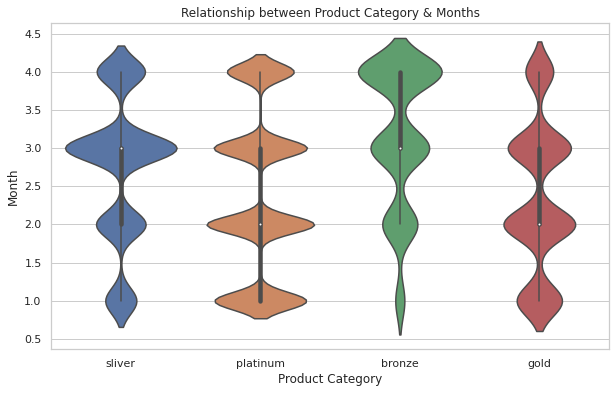

In [202]:
plt.figure(figsize=(10,6))
#using violinplot to showcase density and distribtuion of prices

viz_2=sns.violinplot(data=df3, x='Product-category', y='month_of_date')
viz_2.set_title('Relationship between Product Category & Months')
viz_2.set_xlabel('Product Category')
viz_2.set_ylabel("Month")

The Violin chart gives us a glimse of what we discussed in the table above.

Text(0, 0.5, 'Demand')

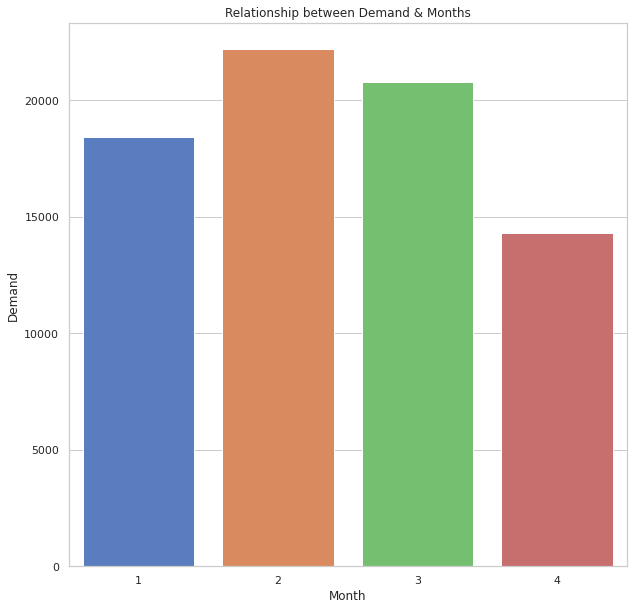

In [203]:
plt.figure(figsize=(10,10))

v=sns.countplot(x=df3['month_of_date'], palette="muted")
v.set_title('Relationship between Demand & Months')
v.set_xlabel('Month')
v.set_ylabel("Demand")

Overall the demand remained highest in the 2nd month and it saw rise at the begining but it even went down below the demand for 1st month eventually.

In [204]:
dfs=df3[df3['Product-category']=='bronze']
df3=df3[df3['Product-category']=='platinum']


As the demand for bronze has increased drastically, we can use this as a reference to analyze exactly which features contributed in the increase and decrease for these categories. 

Text(0, 0.5, 'Quantity')

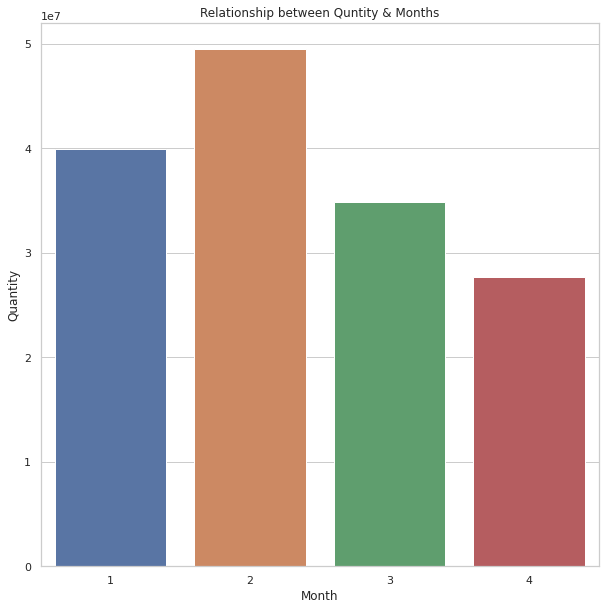

In [205]:
plt.figure(figsize=(10,10))
d=df3.groupby('month_of_date')['order-units'].sum().reset_index(name='quantity')
v=sns.barplot(x=d['month_of_date'],y=d['quantity'])
v.set_title('Relationship between Quntity & Months')
v.set_xlabel('Month')
v.set_ylabel("Quantity")

However if we look into the quantity of the products being ordered, the quatity has decreased drastically and so we can say that the quantity of the products being sold has reduced that has impacted our sale for platinum category.

Mostly in the wholesale business, much business comes from a handful of retail customers that largely contribute to the quantity being sold.
So this could be one of the aspect while analysing the demand reduction for this category.
As some of the retailers might have ordered for platinum category products at the begining and might have realised that the demand in the secondary market is more for the other categories and so the other two categories saw increase subsquently.

In [206]:
d

,month_of_date,quantity
0,1,39876786
1,2,49519423
2,3,34846253
3,4,27659839


As we are not given with the purchaser id, it will be harder to prove this hypothesis but this could be one of the aspect while analysing the demand trend.

In [207]:
df3

,order-id,product-id,order-units,order-date,Product-id,Product-category,Product-launch,Product-source,google-search-keyword,month_of_date,day_of_date,year_of_date,date,Week_Number
1,ord-1004420,UZ216732XH,3000,2020-01-01 13:46:26,UZ216732XH,platinum,2020-01-01 12:03:51,tele-sales,NaN,1,1,2020,2020-01-01,1
2,ord-1004421,UZ216732XH,3000,2020-01-01 14:18:59,UZ216732XH,platinum,2020-01-01 12:03:51,tele-sales,NaN,1,1,2020,2020-01-01,1
3,ord-1004422,UZ216732XH,2000,2020-01-01 14:42:19,UZ216732XH,platinum,2020-01-01 12:03:51,tele-sales,NaN,1,1,2020,2020-01-01,1
4,ord-1004423,UZ216732XH,3000,2020-01-01 14:54:17,UZ216732XH,platinum,2020-01-01 12:03:51,tele-sales,NaN,1,1,2020,2020-01-01,1
5,ord-1004424,UZ216732XH,2500,2020-01-01 14:58:18,UZ216732XH,platinum,2020-01-01 12:03:51,tele-sales,NaN,1,1,2020,2020-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75725,ord-1086599,AX174841YS,500,2020-04-30 12:46:29,AX174841YS,platinum,2020-04-29 18:26:24,android,NaN,4,30,2020,2020-04-30,18
75726,ord-1086595,JE365254JP,100,2020-04-30 12:46:58,JE365254JP,platinum,2020-04-29 17:10:36,google,sell in bulk online,4,30,2020,2020-04-30,18
75727,ord-1086600,AX174841YS,500,2020-04-30 12:47:43,AX174841YS,platinum,2020-04-29 18:26:24,android,NaN,4,30,2020,2020-04-30,18
75728,ord-1086612,GK244531FS,500,2020-04-30 12:48:36,GK244531FS,platinum,2020-04-30 12:28:29,website,NaN,4,30,2020,2020-04-30,18


Text(0, 0.5, 'Demand')

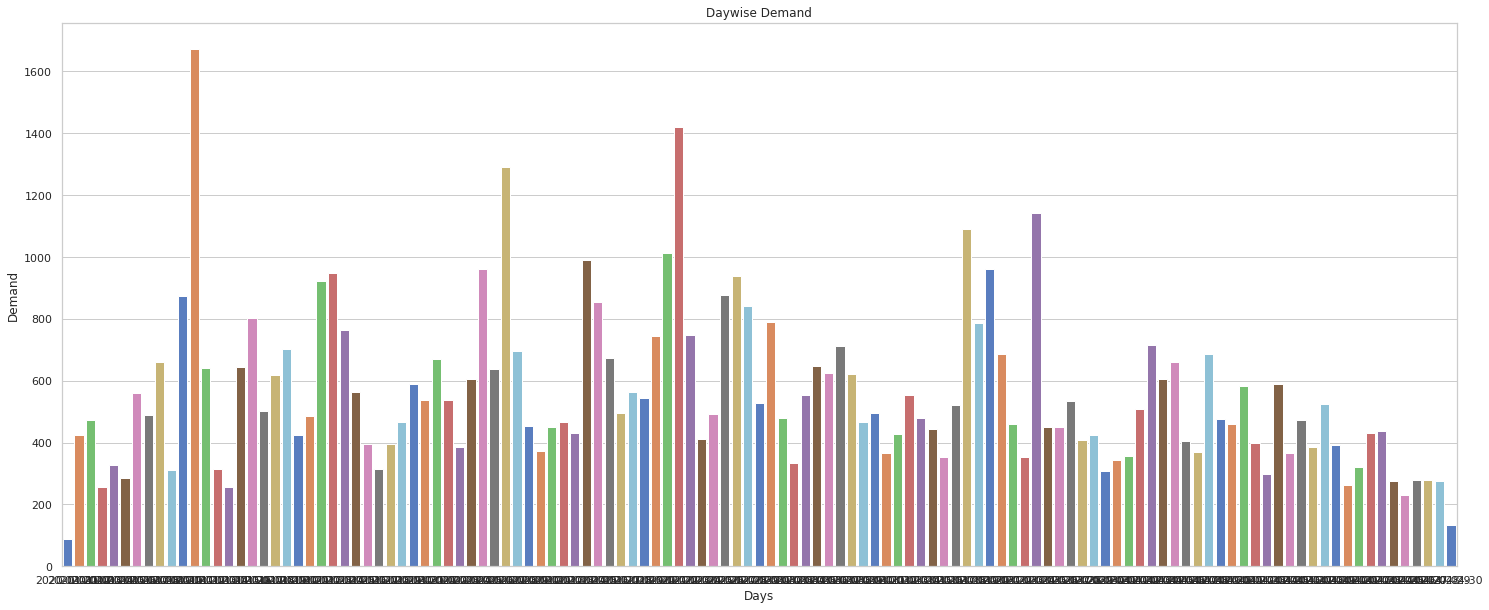

In [208]:
plt.figure(figsize=(25,10))
v=sns.countplot(x=df3['date'], palette="muted")
v.set_title('Daywise Demand')
v.set_xlabel('Days')
v.set_ylabel("Demand")

# **Product-wise Distribution**

In [209]:
df3['Product-id'].nunique()

1452

We have 1452 unique products of platinum segment in our inventory.

In [210]:
d=df3.groupby(['product-id'])['order-id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
d

,product-id,count
566,KC436776SR,2122
537,JS705494JI,1857
307,FO304915IU,1518
750,NR528159TO,1124
824,PE305394XZ,1064
...,...,...
762,NY877954VA,1
125,BY239891DG,1
768,OA701390LY,1
769,OA921425SN,1


There are some products that were ordered many times and some that were ordered only ones. We will look deeper into what is the quantity if these products that were purchased many times.

In [211]:
k=df3.groupby(['product-id'])['order-units'].mean().reset_index(name='average').sort_values(by='average',ascending=False)
k

,product-id,average
763,NZ324899WZ,300000.0
236,EI162034CU,250500.0
61,AV452896DQ,104550.0
1235,WN443620OY,22750.5
634,LJ509114EJ,20000.0
...,...,...
245,EK817914SV,100.0
1194,VV443910ZA,100.0
284,FC618063KG,100.0
112,BU952815MT,100.0


Some of the products seemed to be ordered in bulk and then there are some which were ordered in very less quantity. 
One of the resons cold be that the demand for the prior ones was high in the market and so many retailers ordered them in bulk.

In [212]:
m=pd.merge(k, d, how='left', left_on=['product-id'], right_on=['product-id'])
m

,product-id,average,count
0,NZ324899WZ,300000.0,7
1,EI162034CU,250500.0,2
2,AV452896DQ,104550.0,2
3,WN443620OY,22750.5,10
4,LJ509114EJ,20000.0,1
...,...,...,...
1447,EK817914SV,100.0,2
1448,VV443910ZA,100.0,2
1449,FC618063KG,100.0,1
1450,BU952815MT,100.0,1


In [213]:
m=pd.merge(d, k, how='left', left_on=['product-id'], right_on=['product-id'])
m

,product-id,count,average
0,KC436776SR,2122,1806.880302
1,JS705494JI,1857,6797.952612
2,FO304915IU,1518,4030.237154
3,NR528159TO,1124,2085.040036
4,PE305394XZ,1064,1045.859023
...,...,...,...
1447,NY877954VA,1,200.000000
1448,BY239891DG,1,100.000000
1449,OA701390LY,1,1000.000000
1450,OA921425SN,1,100.000000


We can conclude that some of the products that had high average quantity being ordered, the number of times it was ordered is quite less and so many retailers might have ordered them in bulk and stored it before the prices hike in the market. 
For example, while we have products like KC436776SR which was ordered more than 2000 times, the average quantity waas only 1806 while the products like NZ324899WZ and EI162034CU were not even ordered 10 times but the average quantity is huge.

# **Product Launch Distribution**

In [214]:
df2['month_of_date'] = df2['Product-launch'].dt.month
df2['day_of_date'] = df2['Product-launch'].dt.day
df2['year_of_date'] = df2['Product-launch'].dt.year
df2['Week_Number'] = df2['Product-launch'].dt.week


In [215]:
df2['date']=df2['day_of_date'].map(str)+df2['month_of_date'].map(str)+df2['year_of_date'].map(str)

In [216]:
df2

,Product-id,Product-category,Product-launch,Product-source,google-search-keyword,month_of_date,day_of_date,year_of_date,Week_Number,date
0,AH737757QD,platinum,2020-01-01 00:00:16,google,sell in bulk online,1,1,2020,1,112020
1,YR294414SA,sliver,2020-01-01 00:04:56,website,NaN,1,1,2020,1,112020
2,EA137670JT,platinum,2020-01-01 00:05:29,google,sell in bulk online,1,1,2020,1,112020
3,GD677868SD,platinum,2020-01-01 00:32:19,google,sell on flipkart,1,1,2020,1,112020
4,TJ988922PQ,platinum,2020-01-01 05:19:12,website,NaN,1,1,2020,1,112020
...,...,...,...,...,...,...,...,...,...,...
14925,LZ287517JD,sliver,2020-04-30 12:30:47,website,NaN,4,30,2020,18,3042020
14926,WI601616KC,sliver,2020-04-30 12:33:09,website,NaN,4,30,2020,18,3042020
14927,WO687019DL,platinum,2020-04-30 12:36:59,website,NaN,4,30,2020,18,3042020
14928,YV777136QD,platinum,2020-04-30 12:41:44,website,NaN,4,30,2020,18,3042020


In [217]:
d=df2.groupby('month_of_date')['Product-id'].count()
d

month_of_date
1    3541
2    3438
3    3859
4    4092
Name: Product-id, dtype: int64

The distribution seems to be even. We have launched maximum number of products in 4th month.

Text(0, 0.5, 'Number of products being launched')

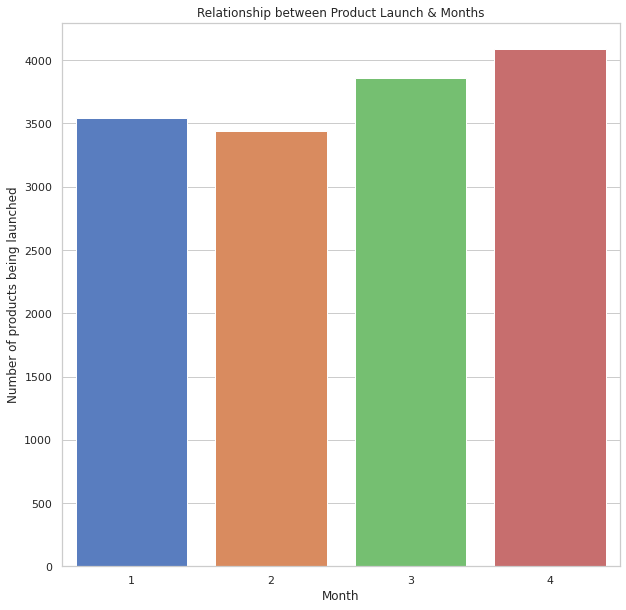

In [218]:
plt.figure(figsize=(10,10))
v=sns.countplot(x=df2['month_of_date'],palette="muted")
v.set_title('Relationship between Product Launch & Months')
v.set_xlabel('Month')
v.set_ylabel("Number of products being launched")

In [219]:
d=df2.groupby('Week_Number')['Product-id'].count()
d

Week_Number
1      632
2      818
3      706
4      793
5      840
6      733
7      780
8      945
9      832
10     713
11     922
12     868
13     966
14    1007
15    1041
16     928
17     963
18     443
Name: Product-id, dtype: int64

Text(0, 0.5, 'Number of Products Launched')

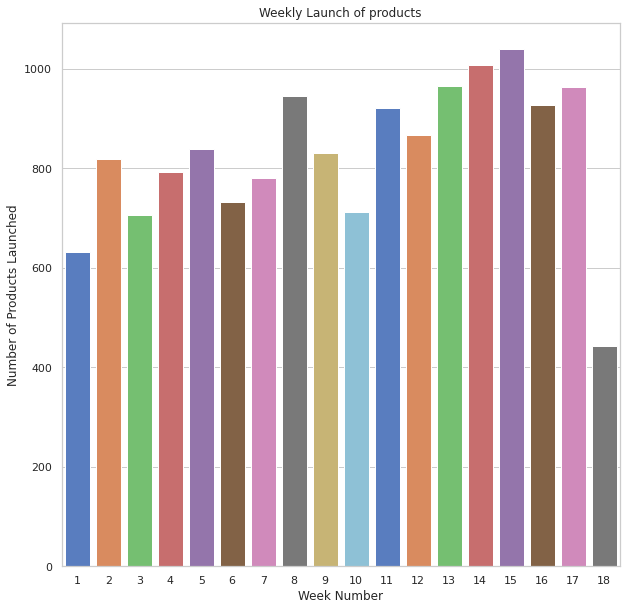

In [220]:
plt.figure(figsize=(10,10))
v=sns.countplot(x=df2['Week_Number'],palette="muted")
v.set_title('Weekly Launch of products')
v.set_xlabel('Week Number')
v.set_ylabel("Number of Products Launched")

The above figure depicts the week wise launch of products. We can say that we kept on launching new products till the week 17. However the least products were launched in week 18.

Text(0, 0.5, 'Demand')

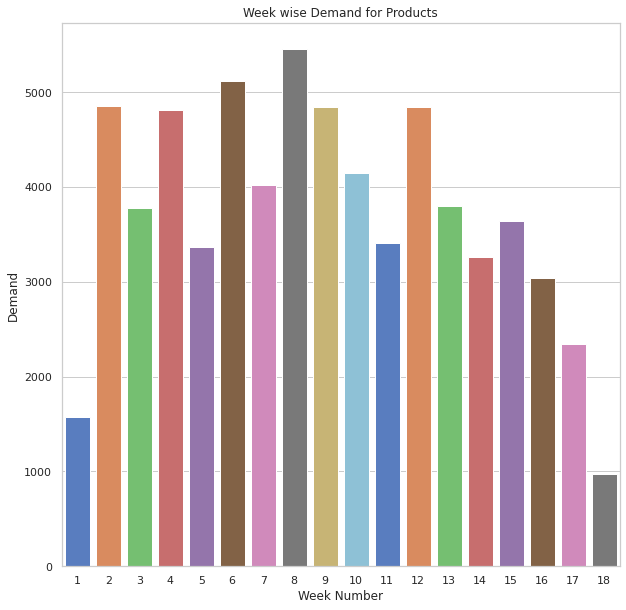

In [221]:
plt.figure(figsize=(10,10))
v=sns.countplot(x=df3['Week_Number'],palette="muted")
v.set_title('Week wise Demand for Products')
v.set_xlabel('Week Number')
v.set_ylabel("Demand")

Similar to the trend on launching, we had least demand for our platinum products in the 18 week. The demand was maximum on the 8th week and it reduced significantly after week 12.

In [222]:
d=df2.groupby('date')['Product-id'].count().reset_index(name='count')

In [223]:
d

,date,count
0,1012020,130
1,1022020,92
2,1032020,113
3,1042020,176
4,1112020,94
...,...,...
116,842020,161
117,912020,125
118,922020,91
119,932020,143


Text(0, 0.5, 'Number of Products Launched')

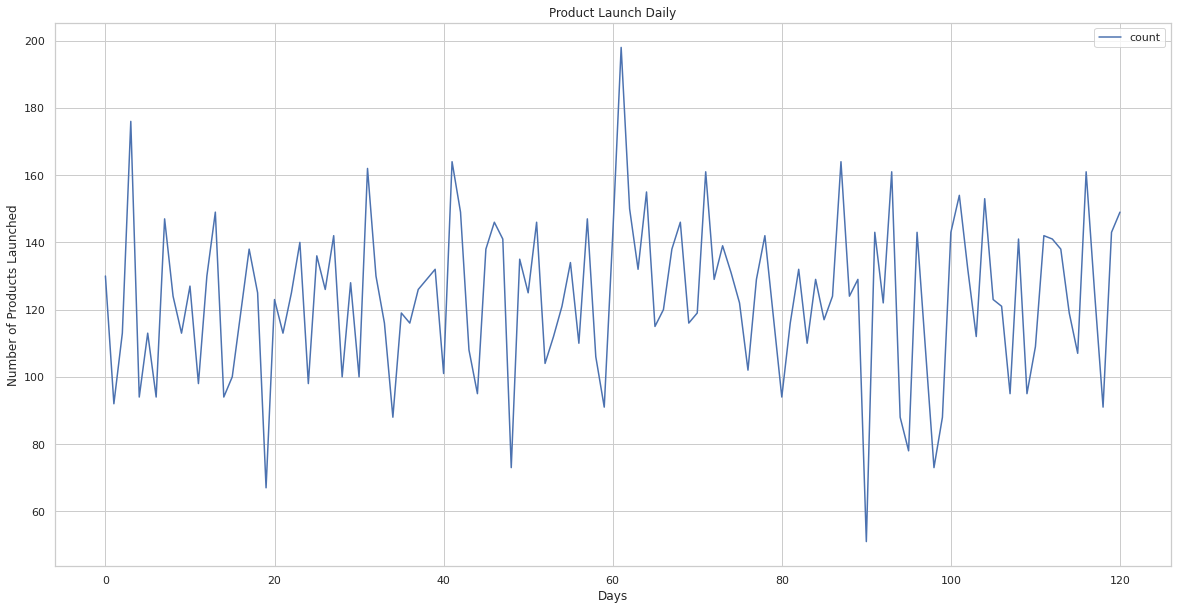

In [224]:
plt.figure(figsize=(20,10))
v=sns.lineplot(data=d)
v.set_title('Product Launch Daily')
v.set_xlabel('Days')
v.set_ylabel("Number of Products Launched")

The above figure shows the day-wise launch of products. The data depicts that we has stationery relationship and the mean remained the same over the period.

# **Product Source**

We have multiple sources for the products that we are launching. Most of the products are being sold through tele sales. We can conclude that tele sales and website are the two most import sources through which we are driving our business. Furether analysis into these sources will help us to findout the root cause for the platinum category products demand reduction.

In [225]:
d=df3.groupby(['month_of_date','Product-source'])['order-id'].count().unstack()
d

Product-source,android,facebook,google,tele-sales,website,whatsapp
month_of_date,,,,,,
1,267,81,1661,8037,6032,1106
2,540,8,3416,10537,5553,57
3,562,75,3567,7403,5633,211
4,267,61,2629,5643,3646,281


Text(0, 0.5, 'Demand')

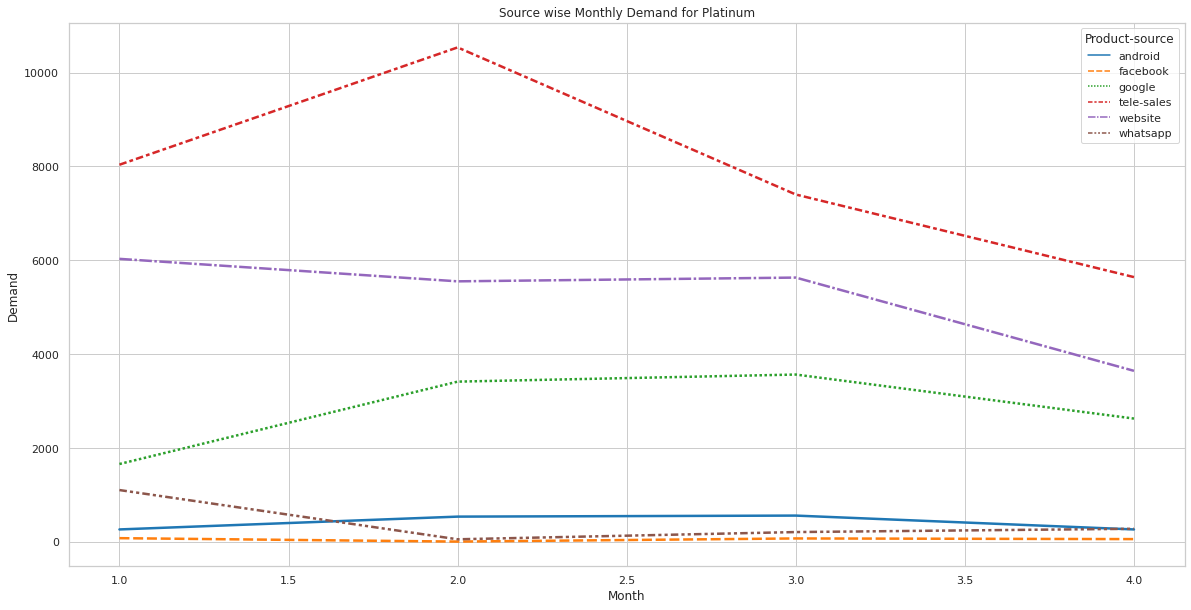

In [226]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20,10))
v=sns.lineplot(data=d, palette="tab10", linewidth=2.5)
v.set_title('Source wise Monthly Demand for Platinum')
v.set_xlabel('Month')
v.set_ylabel("Demand")

From the above graph it is clear that the tele sales and website channel are the main source of business for platinum category products. But as we discussed earlier, what could be the reason for the sharp decline??? 
Let's find out using the graph for bronze category.

Text(0, 0.5, 'Demand')

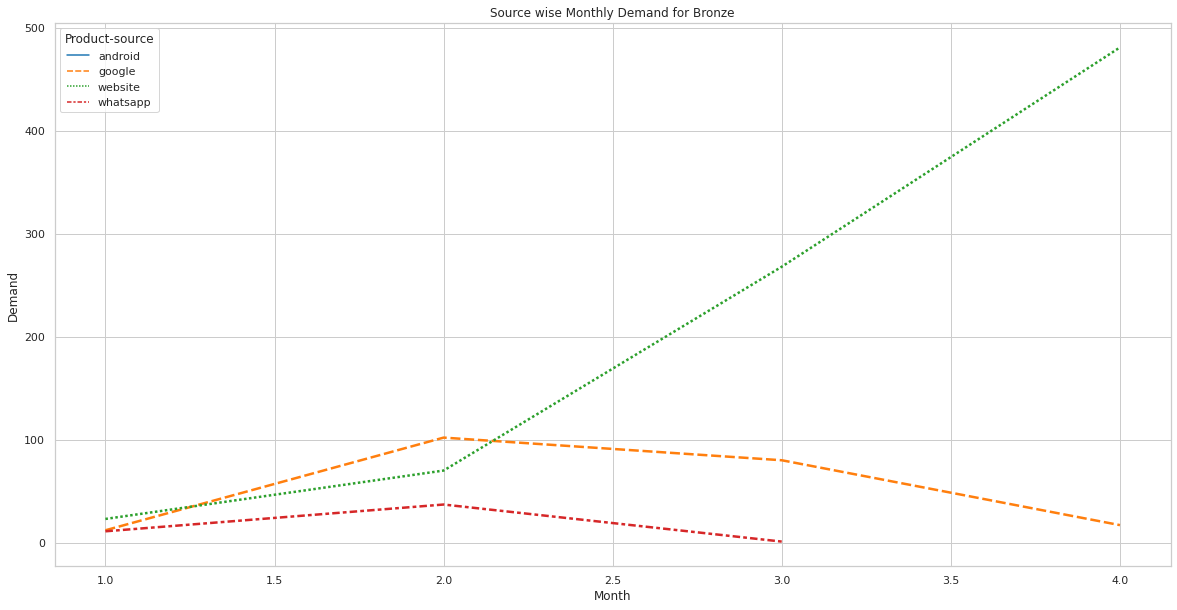

In [227]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20,10))
v=sns.lineplot(data=dfs.groupby(['month_of_date','Product-source'])['order-id'].count().unstack(), palette="tab10", linewidth=2.5)
v.set_title('Source wise Monthly Demand for Bronze')
v.set_xlabel('Month')
v.set_ylabel("Demand")

We can say that Bronze category products are highly dependent on website source and most of the products are being ordered/published through this medium only. There was sharp increase over the period of time and so we can conclude that people have switched to this category from platinum on website.

The reasons could be the quality/cost of these products or the recommender channel through which these products are being published to the customers.

In [228]:
df3.groupby('Product-source')['order-units'].sum().reset_index(name='count').sort_values(by='count',ascending=False)

,Product-source,count
3,tele-sales,80133967
4,website,42200566
2,google,21731779
5,whatsapp,4412337
0,android,2993184
1,facebook,430468


So from the above graphs we can conclude that the demand for platinum products can be enhanced by improving the tele salses channels as most of the sales are through this channel only.
For the same products the company might consider some alternative channels like whatsapp/facebook which will improve their contribution in the product sales.

# **Product launch Vs Demand**

In [229]:
df3['daydiff']=df3['order-date'].dt.date-df3['Product-launch'].dt.date
df3

,order-id,product-id,order-units,order-date,Product-id,Product-category,Product-launch,Product-source,google-search-keyword,month_of_date,day_of_date,year_of_date,date,Week_Number,daydiff
1,ord-1004420,UZ216732XH,3000,2020-01-01 13:46:26,UZ216732XH,platinum,2020-01-01 12:03:51,tele-sales,NaN,1,1,2020,2020-01-01,1,0 days
2,ord-1004421,UZ216732XH,3000,2020-01-01 14:18:59,UZ216732XH,platinum,2020-01-01 12:03:51,tele-sales,NaN,1,1,2020,2020-01-01,1,0 days
3,ord-1004422,UZ216732XH,2000,2020-01-01 14:42:19,UZ216732XH,platinum,2020-01-01 12:03:51,tele-sales,NaN,1,1,2020,2020-01-01,1,0 days
4,ord-1004423,UZ216732XH,3000,2020-01-01 14:54:17,UZ216732XH,platinum,2020-01-01 12:03:51,tele-sales,NaN,1,1,2020,2020-01-01,1,0 days
5,ord-1004424,UZ216732XH,2500,2020-01-01 14:58:18,UZ216732XH,platinum,2020-01-01 12:03:51,tele-sales,NaN,1,1,2020,2020-01-01,1,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75725,ord-1086599,AX174841YS,500,2020-04-30 12:46:29,AX174841YS,platinum,2020-04-29 18:26:24,android,NaN,4,30,2020,2020-04-30,18,1 days
75726,ord-1086595,JE365254JP,100,2020-04-30 12:46:58,JE365254JP,platinum,2020-04-29 17:10:36,google,sell in bulk online,4,30,2020,2020-04-30,18,1 days
75727,ord-1086600,AX174841YS,500,2020-04-30 12:47:43,AX174841YS,platinum,2020-04-29 18:26:24,android,NaN,4,30,2020,2020-04-30,18,1 days
75728,ord-1086612,GK244531FS,500,2020-04-30 12:48:36,GK244531FS,platinum,2020-04-30 12:28:29,website,NaN,4,30,2020,2020-04-30,18,0 days


We have created a separate column to see how the new launched product gets respose from the market. The column is 'daydiff' which is simply difference between the launch date and order date. 

In [230]:
d=df3.groupby('daydiff')['order-id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
d

,daydiff,count
4,1 days,18339
3,0 days,11212
5,2 days,9394
6,3 days,5818
7,4 days,4068
...,...,...
101,102 days,1
1,-3 days,1
103,107 days,1
104,112 days,1


Text(0, 0.5, 'Demand')

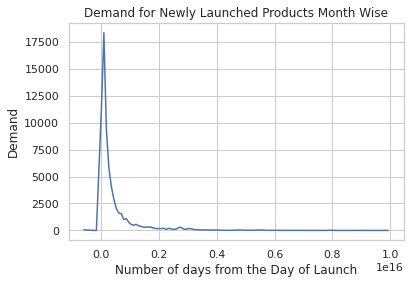

In [231]:
v=sns.lineplot(x=d['daydiff'],y=d['count'])
v.set_title('Demand for Newly Launched Products Month Wise')
v.set_xlabel('Number of days from the Day of Launch')
v.set_ylabel("Demand")


From the above table and graph it is clear that most of the products are sold within 5 days of launch and the demand is heavy during few days of launch. 
Let's dive deeper into the products launched month wise and the response the product got immediately after the launch.

In [232]:
d=df3[df3['month_of_date']==1].groupby('daydiff')['order-id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
d.head(5)

,daydiff,count
4,1 days,5019
3,0 days,2812
5,2 days,2670
6,3 days,1737
7,4 days,1236


Text(0, 0.5, 'Demand')

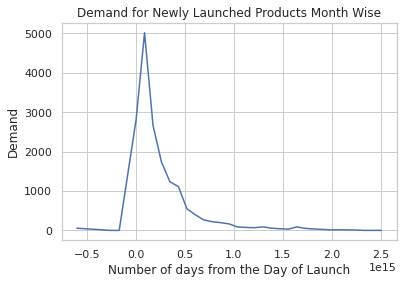

In [233]:
v=sns.lineplot(x=d['daydiff'],y=d['count'])
v.set_title('Demand for Newly Launched Products Month Wise')
v.set_xlabel('Number of days from the Day of Launch')
v.set_ylabel("Demand")

For the first month, most of the products were sold similar to the overall trend.

In [234]:
d=df3[df3['month_of_date']==1].groupby('daydiff')['order-units'].mean().reset_index(name='mean').sort_values(by='mean',ascending=False)
d.head(5)

,daydiff,mean
31,28 days,10245.000000
25,22 days,6124.555556
19,16 days,5136.500000
29,26 days,5119.500000
21,18 days,4878.705882


Text(0, 0.5, 'Demand')

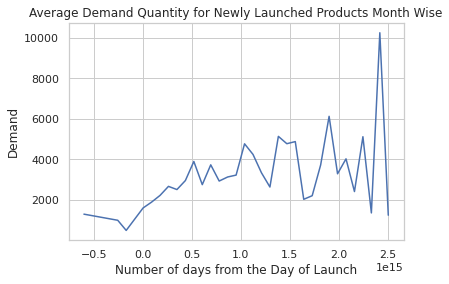

In [235]:
v=sns.lineplot(x=d['daydiff'],y=d['mean'])
v.set_title('Average Demand Quantity for Newly Launched Products Month Wise')
v.set_xlabel('Number of days from the Day of Launch')
v.set_ylabel("Demand")

In [236]:
d=df3[df3['month_of_date']==2].groupby('daydiff')['order-id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
d.head(5)

,daydiff,count
1,1 days,5829
0,0 days,2832
2,2 days,2795
3,3 days,1539
4,4 days,1046


Text(0, 0.5, 'Demand')

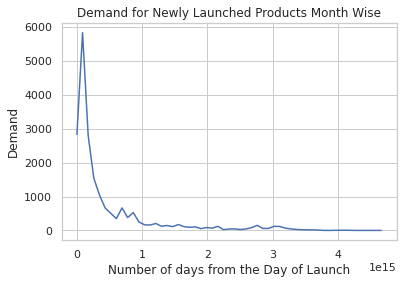

In [237]:
v=sns.lineplot(x=d['daydiff'],y=d['count'])
v.set_title('Demand for Newly Launched Products Month Wise')
v.set_xlabel('Number of days from the Day of Launch')
v.set_ylabel("Demand")

In [238]:
d=df3[df3['month_of_date']==2].groupby('daydiff')['order-units'].mean().reset_index(name='mean').sort_values(by='daydiff')
d.head(5)

,daydiff,mean
0,0 days,1942.324506
1,1 days,2000.323383
2,2 days,2576.825760
3,3 days,2493.111761
4,4 days,3376.716061


Text(0, 0.5, 'Demand')

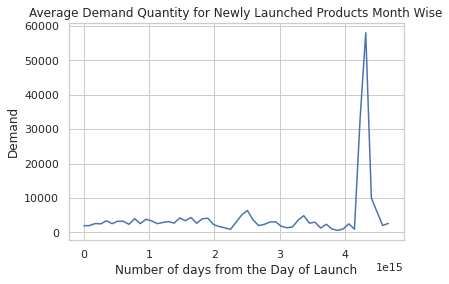

In [239]:
v=sns.lineplot(x=d['daydiff'],y=d['mean'])
v.set_title('Average Demand Quantity for Newly Launched Products Month Wise')
v.set_xlabel('Number of days from the Day of Launch')
v.set_ylabel("Demand")

In [240]:
d=df3[df3['month_of_date']==3].groupby('daydiff')['order-id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
d.head(5)

,daydiff,count
1,1 days,4219
0,0 days,3407
2,2 days,2313
3,3 days,1566
4,4 days,993


Text(0, 0.5, 'Demand')

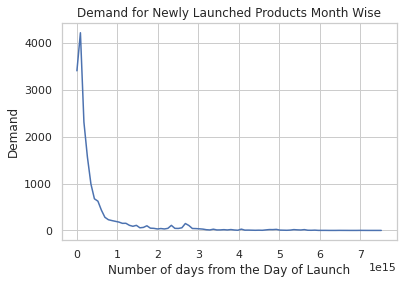

In [241]:
v=sns.lineplot(x=d['daydiff'],y=d['count'])
v.set_title('Demand for Newly Launched Products Month Wise')
v.set_xlabel('Number of days from the Day of Launch')
v.set_ylabel("Demand")

In [242]:
d=df3[df3['month_of_date']==3].groupby('daydiff')['order-units'].mean().reset_index(name='mean').sort_values(by='daydiff')
d.head(5)

,daydiff,mean
0,0 days,1685.103023
1,1 days,1564.822944
2,2 days,1863.227410
3,3 days,1946.408046
4,4 days,2452.456193


Text(0, 0.5, 'Demand')

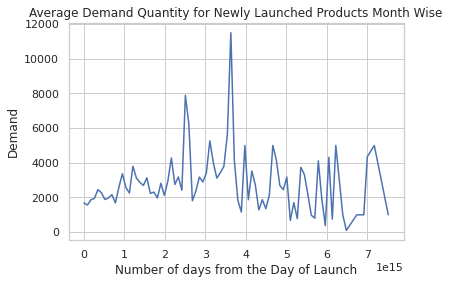

In [243]:
v=sns.lineplot(x=d['daydiff'],y=d['mean'])
v.set_title('Average Demand Quantity for Newly Launched Products Month Wise')
v.set_xlabel('Number of days from the Day of Launch')
v.set_ylabel("Demand")

In [244]:
d=df3[df3['month_of_date']==4].groupby('daydiff')['order-id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
d.head(5)

,daydiff,count
1,1 days,3272
0,0 days,2161
2,2 days,1616
3,3 days,976
4,4 days,793


Text(0, 0.5, 'Demand')

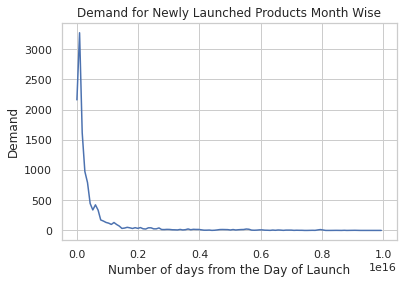

In [245]:
v=sns.lineplot(x=d['daydiff'],y=d['count'])
v.set_title('Demand for Newly Launched Products Month Wise')
v.set_xlabel('Number of days from the Day of Launch')
v.set_ylabel("Demand")

For the second and third month, most of the products were sold similar to the overall trend.

In [246]:
d=df3[df3['month_of_date']==4].groupby('daydiff')['order-units'].mean().reset_index(name='mean').sort_values(by='daydiff')
d.head(5)

,daydiff,mean
0,0 days,1626.243406
1,1 days,1533.905562
2,2 days,3146.779084
3,3 days,1894.673156
4,4 days,1983.638083


Text(0, 0.5, 'Demand')

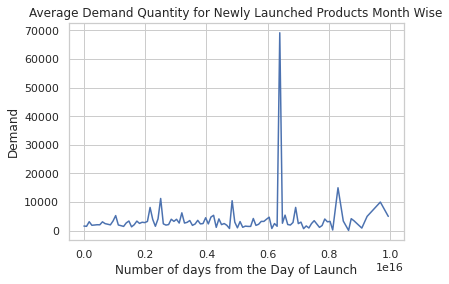

In [247]:
v=sns.lineplot(x=d['daydiff'],y=d['mean'])
v.set_title('Average Demand Quantity for Newly Launched Products Month Wise')
v.set_xlabel('Number of days from the Day of Launch')
v.set_ylabel("Demand")

For the products launched in the 4th month, the products were not able capture the market in the similar fashion as previous months. So we can conclude that the markting channels might be one of the reason for that. Secondly the Retailers ordered the products in bulk as mentioned earlier and so we can say that the newly launched products were not much different than the previous products and so they remained unseen by the retailers.

In [62]:
df3.groupby(['month_of_date','daydiff'])['order-units'].sum().unstack()


daydiff,-7 days,-3 days,-2 days,0 days,1 days,2 days,3 days,4 days,5 days,6 days,...,94 days,96 days,98 days,100 days,101 days,102 days,105 days,107 days,112 days,115 days
month_of_date,,,,,,,,,,,,,,,,,,,,,
1,75500.0,1000.0,500.0,4520652.0,9508533.0,5940391.0,4639952.0,3108434.0,3297488.0,2156348.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,5500663.0,11659885.0,7202228.0,3836899.0,3532045.0,1687562.0,1636367.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,5741146.0,6601988.0,4309645.0,3048075.0,2435289.0,1537860.0,1176389.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,3514312.0,5018939.0,5085195.0,1849201.0,1573025.0,931042.0,700926.0,...,250.0,15000.0,6750.0,100.0,12603.0,3500.0,2750.0,5000.0,10000.0,5000.0


The above Table signifies that many products remained in demand as they were properly published in the market and so the quantity of orders remained high for them.

# **Google Search Keyword**

In [63]:
df2[df2['Product-category']=='platinum'].groupby(['google-search-keyword','month_of_date'])['Product-id'].count().unstack()

month_of_date,1,2,3,4
google-search-keyword,,,,
bulkpro,156.0,185.0,198.0,175.0
bulkpro sell,NaN,2.0,NaN,NaN
sell in bulk online,205.0,210.0,333.0,352.0
sell on amazon,46.0,65.0,61.0,70.0
sell on flipkart,54.0,71.0,16.0,NaN
sell on internet,64.0,57.0,55.0,39.0
sell online,219.0,234.0,280.0,320.0


The above table shows the google keywords associated with the products launched in different months.

In [64]:
df3.groupby(['google-search-keyword','month_of_date'])['Product-id'].count().unstack()

month_of_date,1,2,3,4
google-search-keyword,,,,
bulkpro,893.0,1743.0,2030.0,1048.0
bulkpro sell,NaN,20.0,NaN,NaN
sell in bulk online,225.0,739.0,587.0,495.0
sell on amazon,25.0,34.0,232.0,54.0
sell on flipkart,NaN,32.0,4.0,1.0
sell on internet,118.0,459.0,58.0,73.0
sell online,400.0,389.0,656.0,958.0


The above table shows the google keywords associated with the products ordered in different months.

The above tables show that most of the products being sold on website are having bulkpro as google search keyword however most of the sales occur when we have keyword like bulkpro or sell online so the company might change the keywords fot the products that are not getting much attention on website so as to get sold quickly.

In [65]:
df3['google-search-keyword'].value_counts()

bulkpro                5714
sell online            2403
sell in bulk online    2046
sell on internet        708
sell on amazon          345
sell on flipkart         37
bulkpro sell             20
Name: google-search-keyword, dtype: int64

In [66]:
df3.groupby(['google-search-keyword','month_of_date'])['order-id'].count().unstack()

month_of_date,1,2,3,4
google-search-keyword,,,,
bulkpro,893.0,1743.0,2030.0,1048.0
bulkpro sell,NaN,20.0,NaN,NaN
sell in bulk online,225.0,739.0,587.0,495.0
sell on amazon,25.0,34.0,232.0,54.0
sell on flipkart,NaN,32.0,4.0,1.0
sell on internet,118.0,459.0,58.0,73.0
sell online,400.0,389.0,656.0,958.0


In [67]:
dfs.groupby(['google-search-keyword','month_of_date'])['order-id'].count().unstack()

month_of_date,1,2,3,4
google-search-keyword,,,,
bulkpro,3.0,75.0,31.0,8.0
sell in bulk online,5.0,26.0,43.0,6.0
sell on amazon,NaN,NaN,NaN,2.0
sell online,4.0,1.0,6.0,1.0


In [68]:
dfs['google-search-keyword'].value_counts()

bulkpro                117
sell in bulk online     80
sell online             12
sell on amazon           2
Name: google-search-keyword, dtype: int64

For bronze category most of the products were having bulkpro as keyword and that could be one of the reason for the response these products got on website through the brand name associated with it.

# **Forecasting**

In [250]:
m=df3.groupby('date')['order-units'].sum().reset_index(name='quantity')
m

,date,quantity
0,2020-01-01,162661
1,2020-01-02,636960
2,2020-01-03,981044
3,2020-01-04,687826
4,2020-01-05,623515
...,...,...
116,2020-04-26,809390
117,2020-04-27,460881
118,2020-04-28,471808
119,2020-04-29,3616114


<Figure size 1440x720 with 0 Axes>

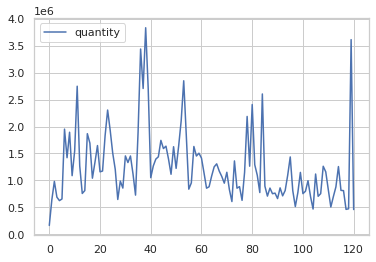

In [251]:
plt.figure(figsize=(20,10))
m.plot()

The series is seasonal and seems to be stationary.

In [71]:
from statsmodels.tsa.stattools import adfuller

In [72]:
test_result=adfuller(m['quantity'])


In [73]:
def adfuller_test(quantity):
    result=adfuller(quantity)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [74]:
adfuller_test(m['quantity'])

ADF Test Statistic : -7.171533164277814
p-value : 2.7962881146754157e-10
#Lags Used : 0
Number of Observations Used : 120
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


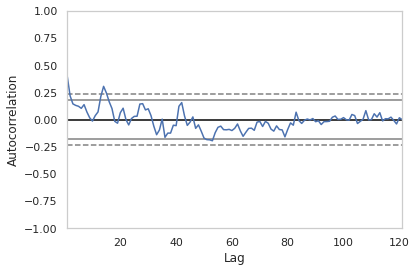

In [75]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(m['quantity'])
plt.show()

In [76]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

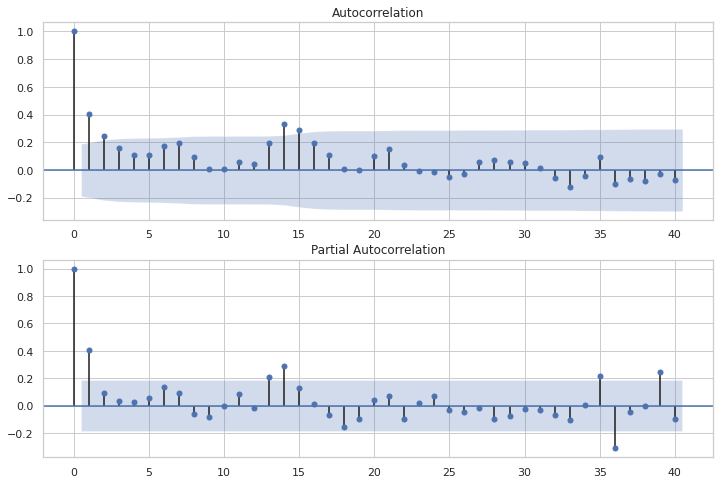

In [77]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(m['quantity'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(m['quantity'].iloc[13:],lags=40,ax=ax2)

In [78]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA


In [79]:
model=ARIMA(m['quantity'],order=(1,1,1))
model_fit=model.fit()


In [80]:
model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:             D.quantity   No. Observations:                  120
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1767.182
Method:                       css-mle   S.D. of innovations         597736.451
Date:                Thu, 08 Dec 2022   AIC                           3542.363
Time:                        16:28:15   BIC                           3553.513
Sample:                             1   HQIC                          3546.891
                                                                              
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -3180.9389   5788.587     -0.550      0.583   -1.45e+04    8164.482
ar.L1.D.quantity     0.3240      0.109      2.973      0.003       0.110       0.538
ma.L1.D.quantity    -0.9441      0.060    -15.820      0.000      -1.061      -0.827
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.0860           +0.0000j            3.0860            0.0000
MA.1            1.0592           +0.0000j            1.0592            0.0000
-----------------------------------------------------------------------------
"""

In [82]:
import statsmodels.api as sm


In [252]:
model=sm.tsa.statespace.SARIMAX(m['quantity'],order=(1, 1, 1),seasonal_order=(1,1,1,35))
results=model.fit()


In [253]:
m.info

<bound method DataFrame.info of            date  quantity
0    2020-01-01    162661
1    2020-01-02    636960
2    2020-01-03    981044
3    2020-01-04    687826
4    2020-01-05    623515
..          ...       ...
116  2020-04-26    809390
117  2020-04-27    460881
118  2020-04-28    471808
119  2020-04-29   3616114
120  2020-04-30    457792

[121 rows x 2 columns]>

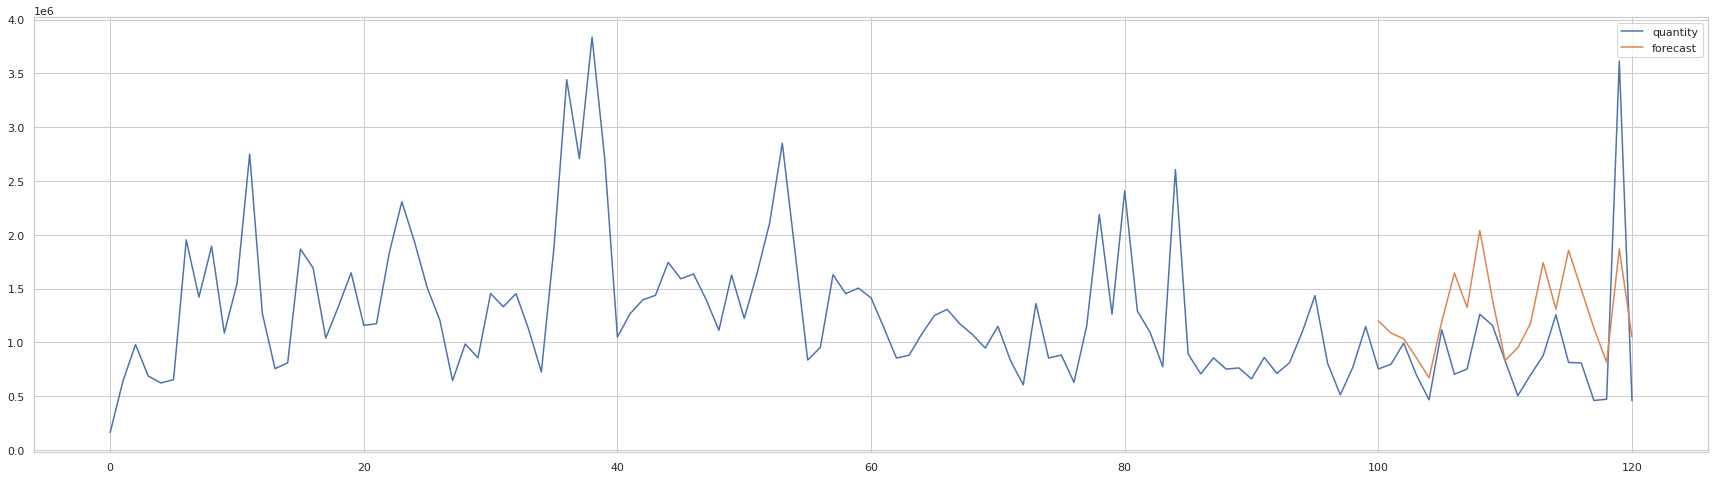

In [254]:
m['forecast']=results.predict(start=
                              100,end=120,dynamic=True)
m[['quantity','forecast']].plot(figsize=(30,8))

The predicted series seems to be well within expected range and so can be used for further analysis

In [255]:
from pandas.tseries.offsets import DateOffset
future_dates=['2020-05-'+str(x) for x in range(1,31)]


In [256]:
future_datest_df=pd.DataFrame(future_dates,columns=['date'])


In [257]:
future_datest_df

,date
0,2020-05-1
1,2020-05-2
2,2020-05-3
3,2020-05-4
4,2020-05-5
5,2020-05-6
6,2020-05-7
7,2020-05-8
8,2020-05-9
9,2020-05-10


In [258]:
future_df=pd.concat([m,future_datest_df]).reset_index()


In [259]:
future_df.head(125)

,index,date,quantity,forecast
0,0,2020-01-01,162661.0,NaN
1,1,2020-01-02,636960.0,NaN
2,2,2020-01-03,981044.0,NaN
3,3,2020-01-04,687826.0,NaN
4,4,2020-01-05,623515.0,NaN
...,...,...,...,...
120,120,2020-04-30,457792.0,1.050358e+06
121,0,2020-05-1,NaN,NaN
122,1,2020-05-2,NaN,NaN
123,2,2020-05-3,NaN,NaN


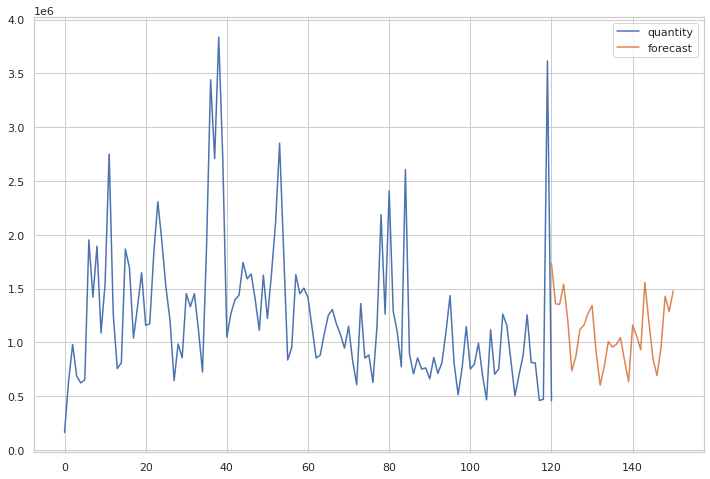

In [260]:
future_df['forecast'] = results.predict(start = 120, end = 150, dynamic= True)  
future_df[['quantity', 'forecast']].plot(figsize=(12, 8)) 


 we have tried to forecast the quantity of platinum products being sold for the upcoming month and so will help the company to take any further steps in that prospect.

# **Conclusion**

○ Quantity of demand for platinum catgory has seen increase in the second month. However, it reduced drastically and it even went down below the first month figures in the third and fourth month. Same remained the trend for gold category. But the demand has increased for bronze and silver category products.
○Mostly in the wholesale business, much business comes from a handful of retail customers that largely contribute to the quantity being sold. So this could be one of the aspect while analyzing the demand reduction for this category. As some of the retailers might have ordered for platinum category products at the begining and might have realized that the demand in the secondary market is more for the other categories and so the other two categories saw increase subsequently.

○ Some of the products that had high average quantity being ordered, the number of times it was ordered is quite less and so many retailers might have ordered them in bulk and stored it before the prices hike in the market. For example, while we have products like KC436776SR which was ordered more than 2000 times, the average quantity was only 1806 while the products like NZ324899WZ and EI162034CU were not even ordered 10 times but the average quantity is huge.
○Bronze category products are highly dependent on website source and most of the products are being ordered/published through this medium only. There was sharp increase over the period of time and so we can conclude that people have switched to this category from platinum on website. The reasons could be the quality/cost of these products or the recommender channel through which these products are being published to the customers.
○We can conclude that the demand for platinum products can be enhanced by improving the tele sales channels as most of the sales are through this channel only. For the same products the company might consider some alternative channels like whatsapp/facebook which will improve their contribution in the product sales.

○ For the products launched in the 4th month, the products were not able capture the market in the similar fashion as previous months. We can conclude that the marketing channels might be one of the reason for that. Secondly the Retailers ordered the products in bulk as mentioned earlier and so we can say that the newly launched products were not much different than the previous products and so they remained unseen by the retailers.
○Most of the products being sold on website are having bulkpro as google search keyword however most of the sales occur when we have keyword like bulkpro or sell online so the company might change the keywords for the products that are not getting much attention on website so as to get sold quickly. Bronze category most of the products were having bulkpro as keyword and that could be one of the reasons for the response these products got on website through the brand name associated with it.

○ We tried to forecast the quantity of platinum products being sold for the upcoming month and so will help the company to take any further steps in that prospect.